In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

#MSE AND MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
df=pd.read_csv('ParisHousing.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.shape

(10000, 17)

In [6]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [8]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [11]:
df1=df.copy()

In [12]:
df1=df1.drop('isNewBuilt',axis=1)


In [13]:
df1.shape


(10000, 16)

In [14]:
df1

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,1,2590,6174,339,1,4,5905107.0


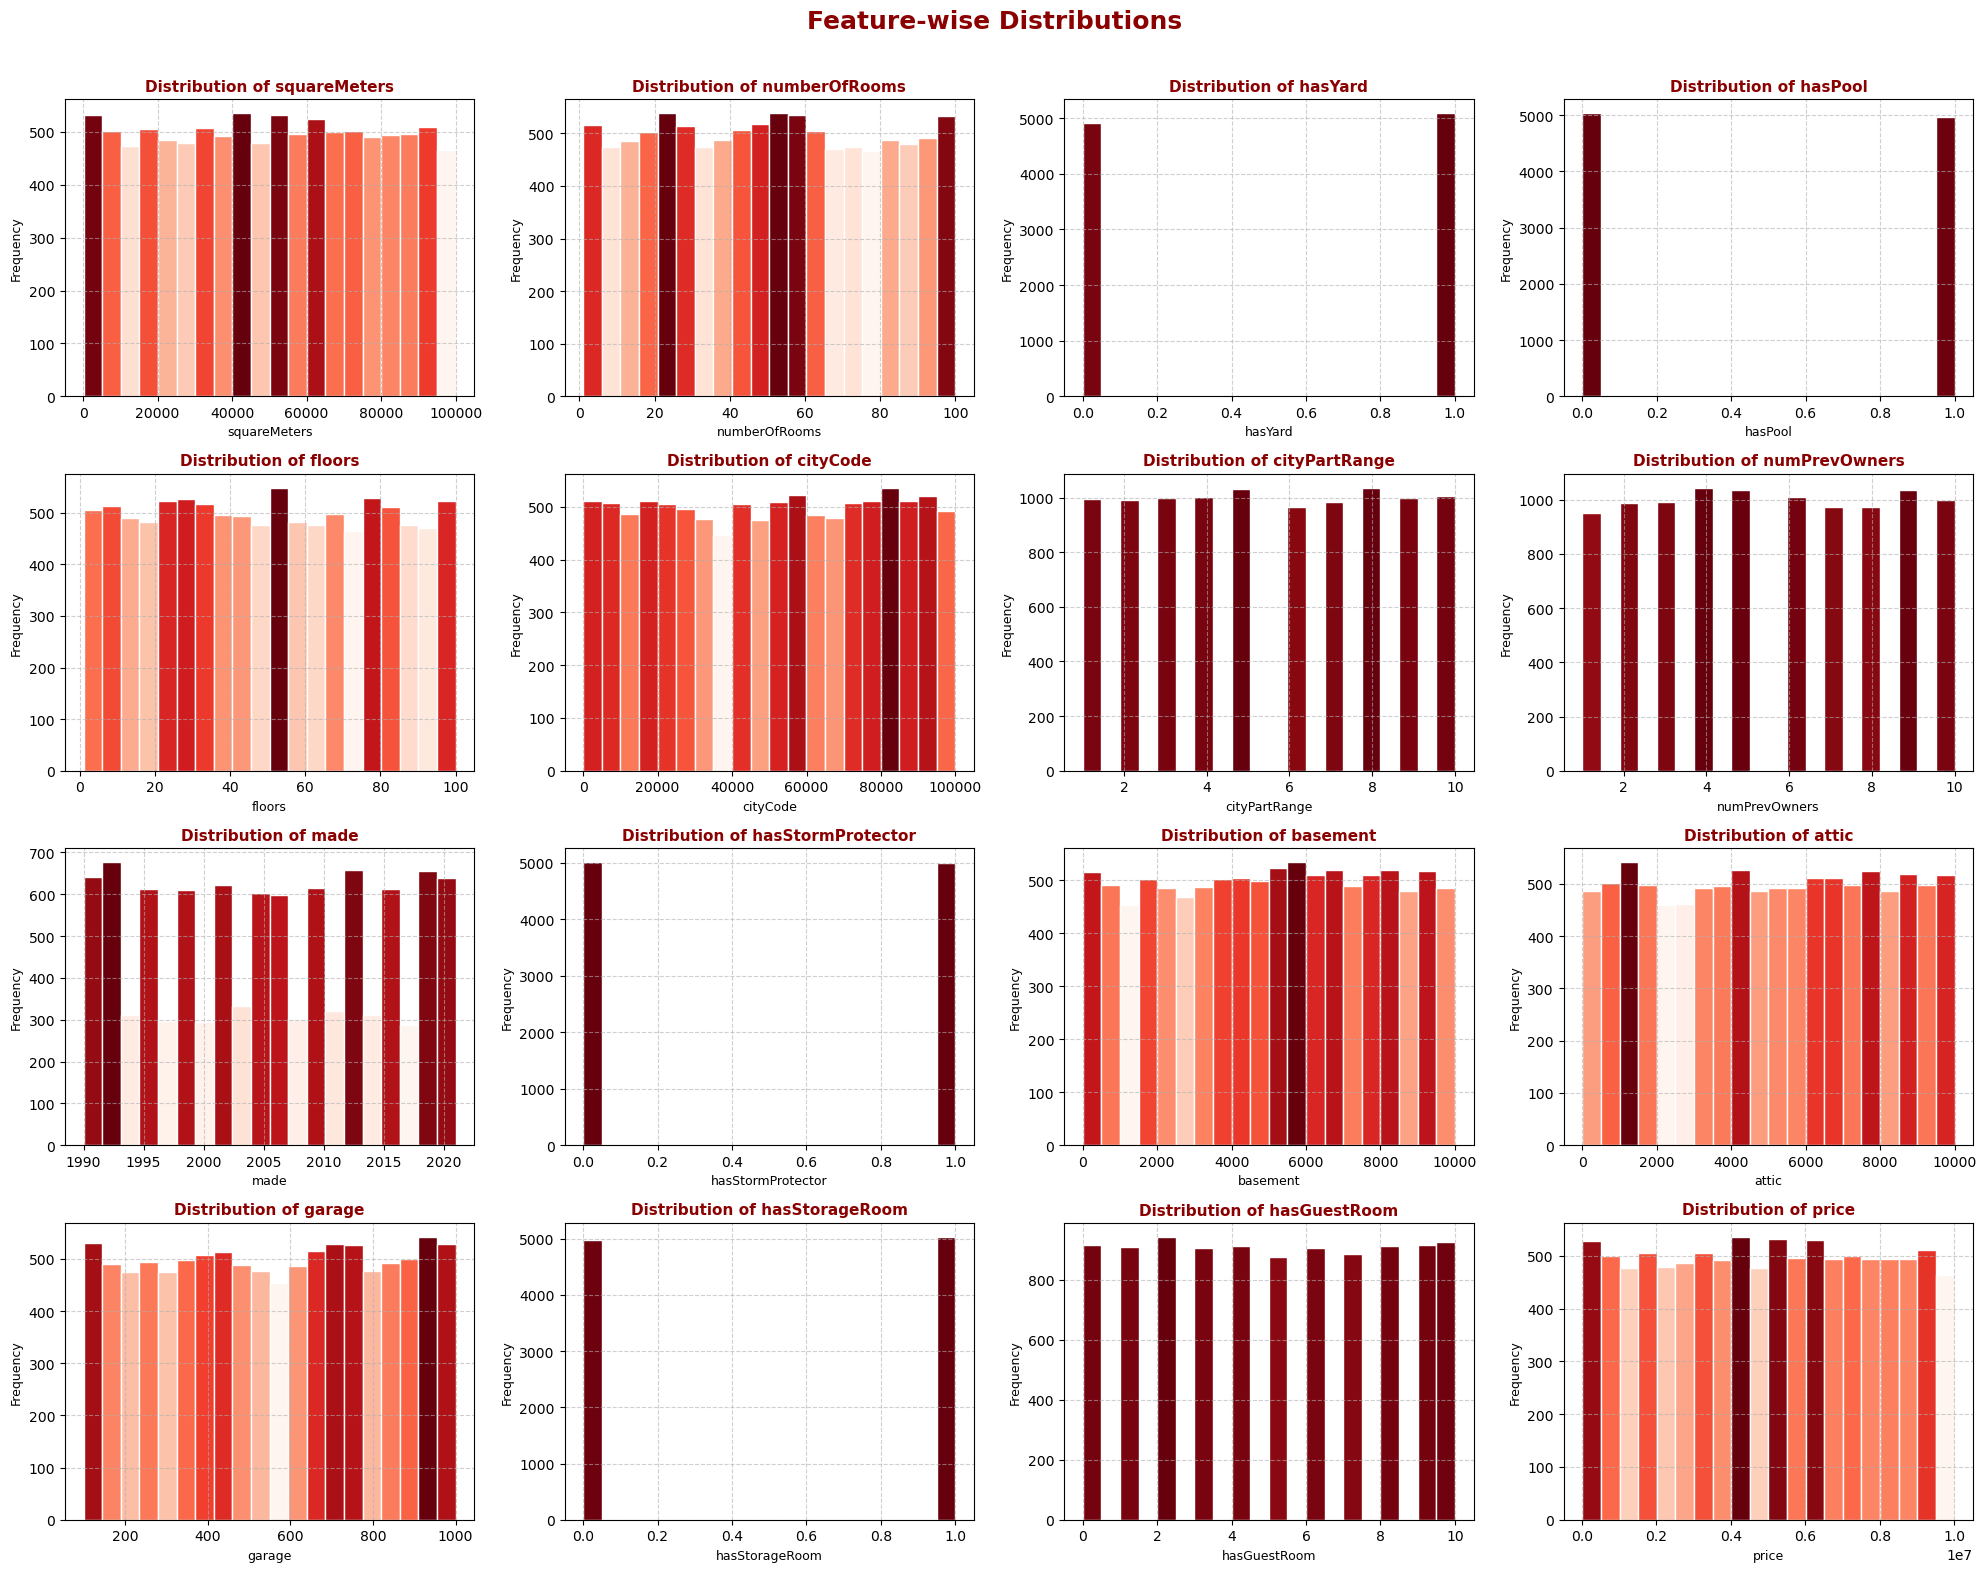

In [15]:
cols = 4
features = df1.columns
rows = len(features) // cols + int(len(features) % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

# Loop through features
for i, col in enumerate(features):
    # Calculate histogram data
    n, bins, patches = axes[i].hist(df1[col], bins=20, edgecolor='white')

    # Apply pink gradient
    norm = plt.Normalize(min(n), max(n))
    for patch, count in zip(patches, n):
        color = plt.cm.Reds(norm(count))  # Red gradient
        patch.set_facecolor(color)
    
    axes[i].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold', color='darkred')
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Removing any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Main title
plt.suptitle('Feature-wise Distributions', fontsize=18, fontweight='bold', color='darkred')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


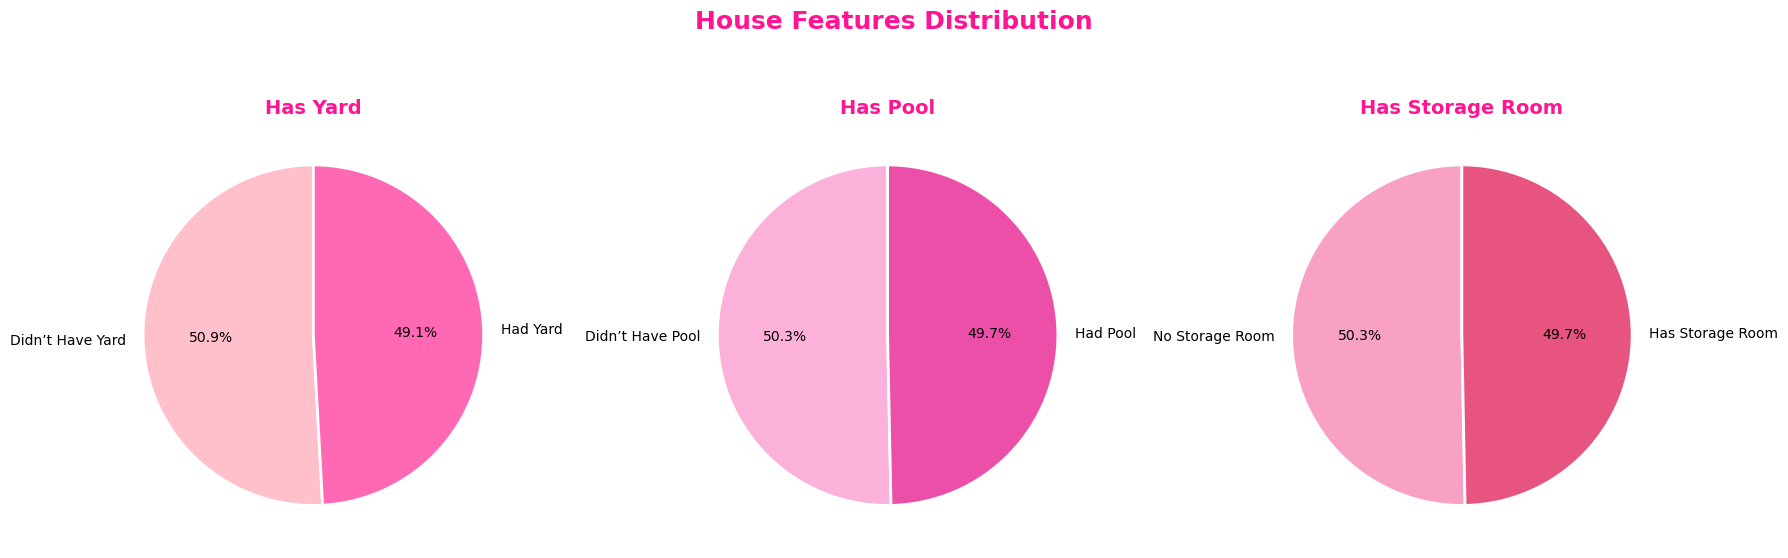

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
features = ['hasYard', 'hasPool', 'hasStorageRoom']
titles = ['Has Yard', 'Has Pool', 'Has Storage Room']
labels = [['Didn’t Have Yard', 'Had Yard'],
          ['Didn’t Have Pool', 'Had Pool'],
          ['No Storage Room', 'Has Storage Room']]

# Gradient color sets (light to dark pink)
colors_list = [
    ['#ffc0cb', '#ff69b4'],  # light pink to hot pink
    ['#fbb1d9', '#ec4fa7'],  # pastel pink to fuchsia
    ['#f8a1c4', '#e75480']   # bubblegum to deep rose
]

# creating each pie chart
for i, ax in enumerate(axes):
    data = df1[features[i]].value_counts()
    ax.pie(data,
           labels=labels[i],
           colors=colors_list[i],
           autopct='%1.1f%%',
           startangle=90,
           wedgeprops={'edgecolor': 'white', 'linewidth': 2})
    ax.set_title(titles[i], fontsize=14, fontweight='bold', color='deeppink')

plt.suptitle('House Features Distribution', fontsize=18, fontweight='bold', color='deeppink')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for suptitle
plt.show()


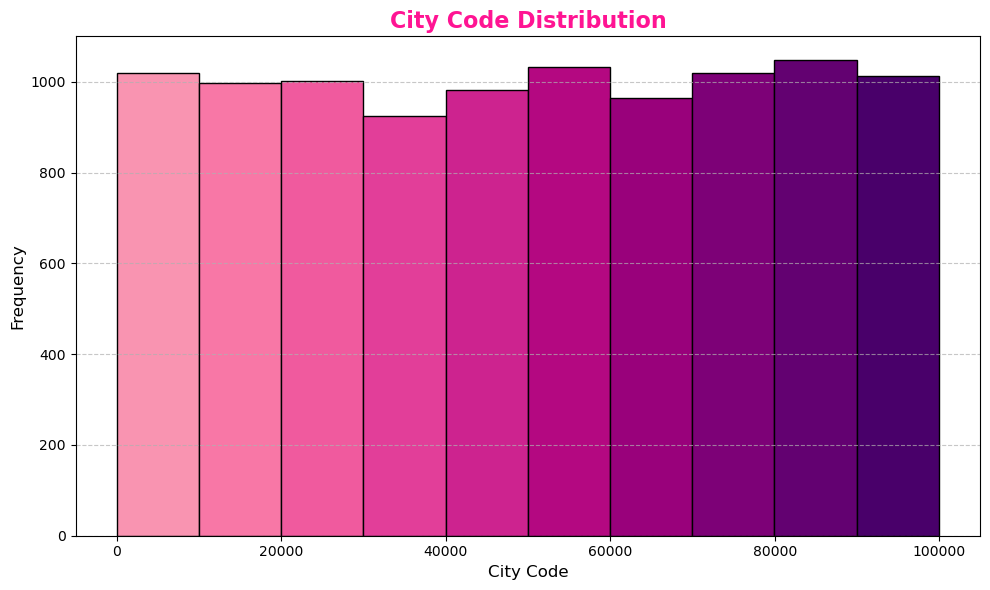

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Plot the histogram and capture patches
counts, bins, patches = plt.hist(df1['cityCode'], bins=10, edgecolor='black')

# Use pink-purple gradient
colors = plt.cm.RdPu(np.linspace(0.4, 1, len(patches)))

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title('City Code Distribution', fontsize=16, fontweight='bold', color='deeppink')
plt.xlabel('City Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


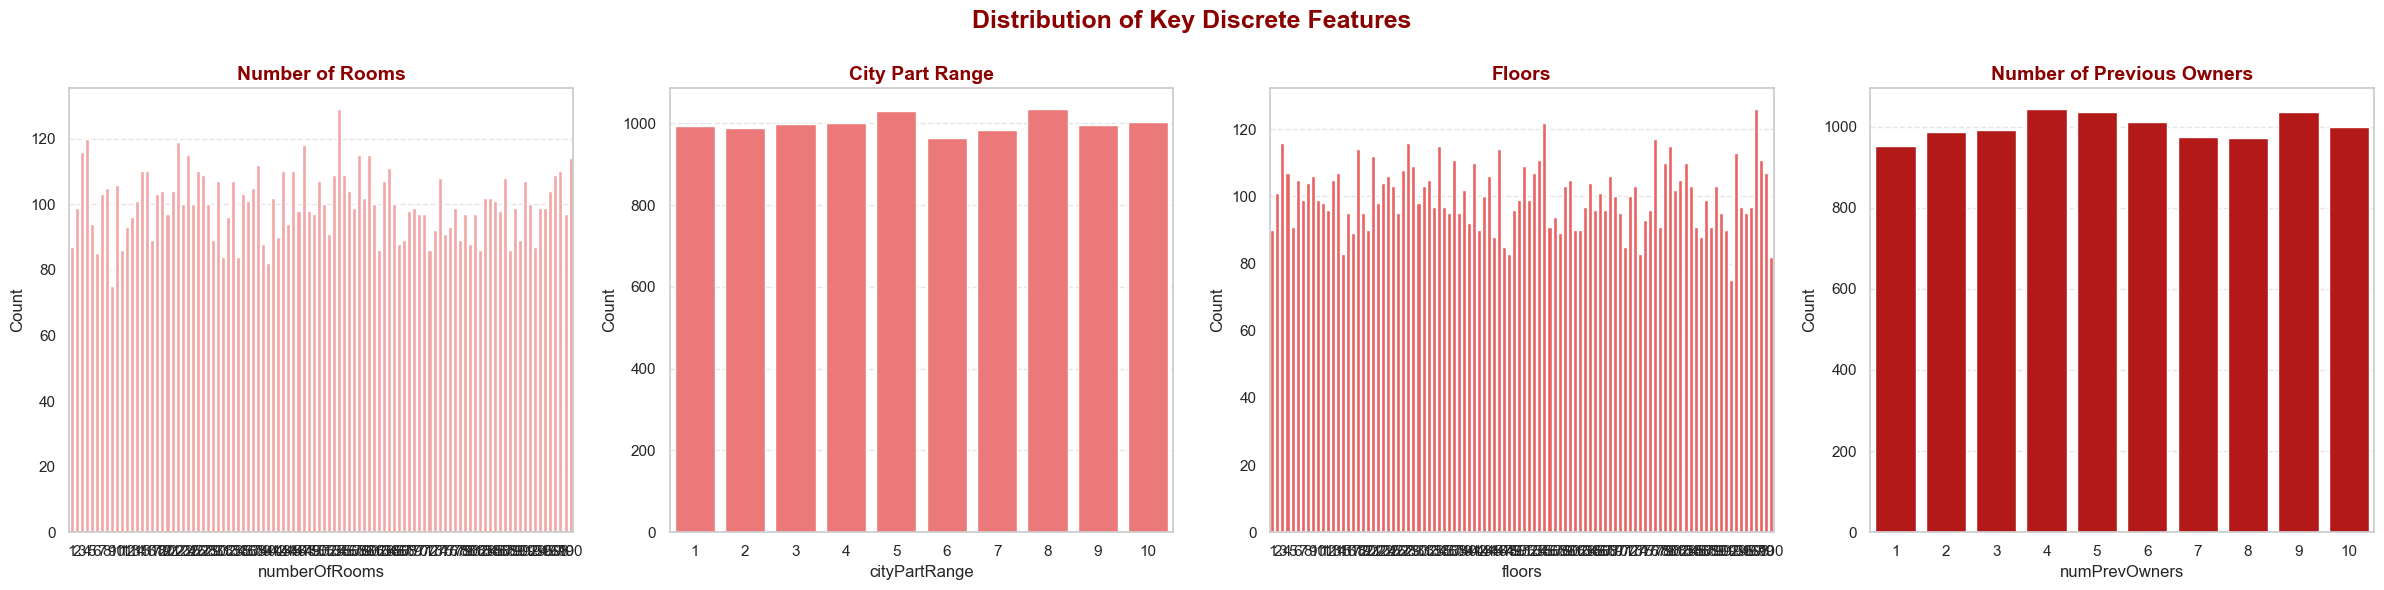

In [18]:
sns.set(style="whitegrid")
features = ['numberOfRooms', 'cityPartRange', 'floors', 'numPrevOwners']
titles = ['Number of Rooms', 'City Part Range', 'Floors', 'Number of Previous Owners']

# Red gradient colors
colors = ['#ff9999', '#ff6666', '#ff4d4d', '#cc0000']

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for i, ax in enumerate(axes):
    value_counts = df1[features[i]].value_counts().sort_index()
    
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=ax,
        palette=[colors[i]] * len(value_counts)
    )
    
    ax.set_title(titles[i], fontsize=14, fontweight='bold', color='darkred')
    ax.set_xlabel(features[i], fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Distribution of Key Discrete Features', fontsize=18, fontweight='bold', color='darkred')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [19]:
print(df1['numPrevOwners'].skew())
print(df1['hasGuestRoom'].skew())
print(df1['floors'].skew())
print(df1['cityPartRange'].skew())
print(df1['cityCode'].skew())

0.0022448613864533107
0.007966378133967165
0.014930628435050101
-0.003339179103415519
-0.02228685177154616


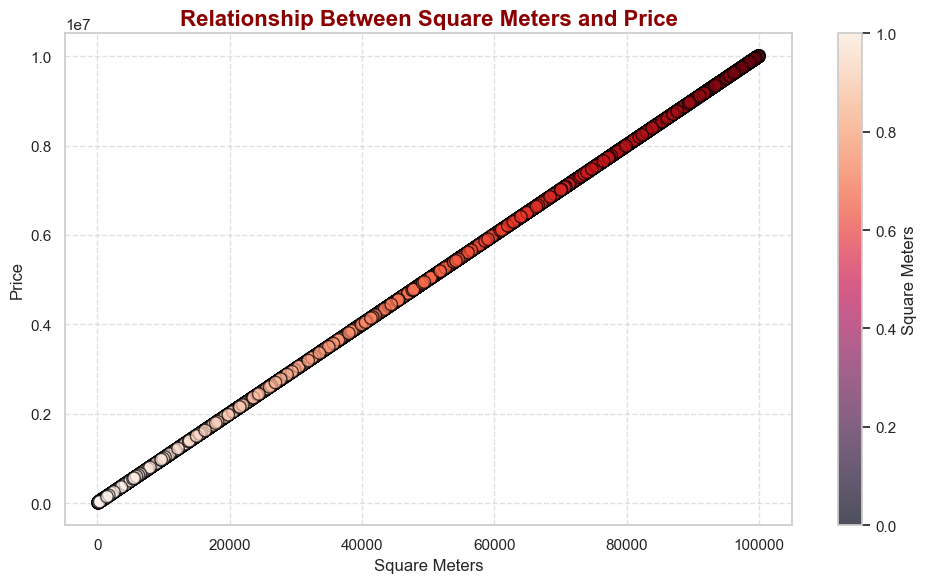

In [20]:
norm = plt.Normalize(df1['squareMeters'].min(), df1['squareMeters'].max())
colors = plt.cm.Reds(norm(df1['squareMeters']))

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with color mapping
scatter = ax.scatter(
    df1['squareMeters'], df1['price'],
    c=colors,
    cmap='Reds',
    edgecolor='black',
    alpha=0.7,
    s=80
)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Square Meters', fontsize=12)

ax.set_title('Relationship Between Square Meters and Price', fontsize=16, fontweight='bold', color='darkred')
ax.set_xlabel('Square Meters', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

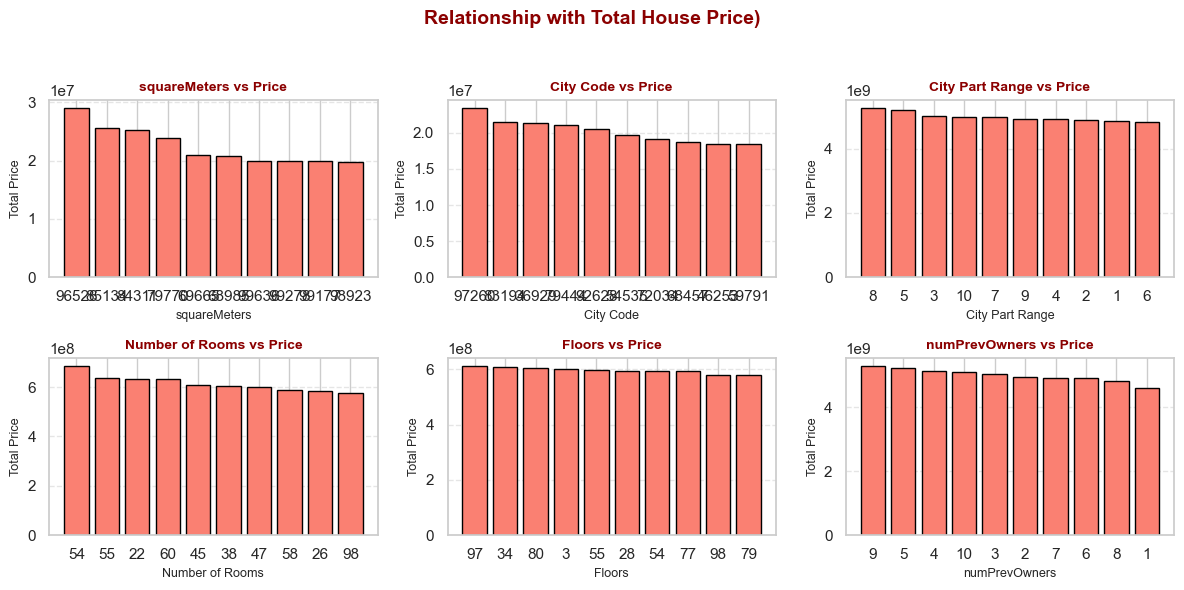

In [21]:
features = ['squareMeters','cityCode', 'cityPartRange', 'numberOfRooms', 'floors','numPrevOwners']
titles = ['squareMeters','City Code', 'City Part Range', 'Number of Rooms', 'Floors','numPrevOwners']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

# Loop through each feature
for i, feature in enumerate(features):
    cbys = df1.groupby(feature)['price'].sum().sort_values(ascending=False).head(10)

    axes[i].bar(cbys.index.astype(str), cbys.values, color='salmon', edgecolor='black')
    axes[i].set_title(f'{titles[i]} vs Price', fontsize=10, fontweight='bold', color='darkred')
    axes[i].set_xlabel(titles[i], fontsize=9)
    axes[i].set_ylabel('Total Price', fontsize=9)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Layout adjustments
plt.suptitle('Relationship with Total House Price)', fontsize=14, fontweight='bold', color='darkred')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [22]:
df1.columns 

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

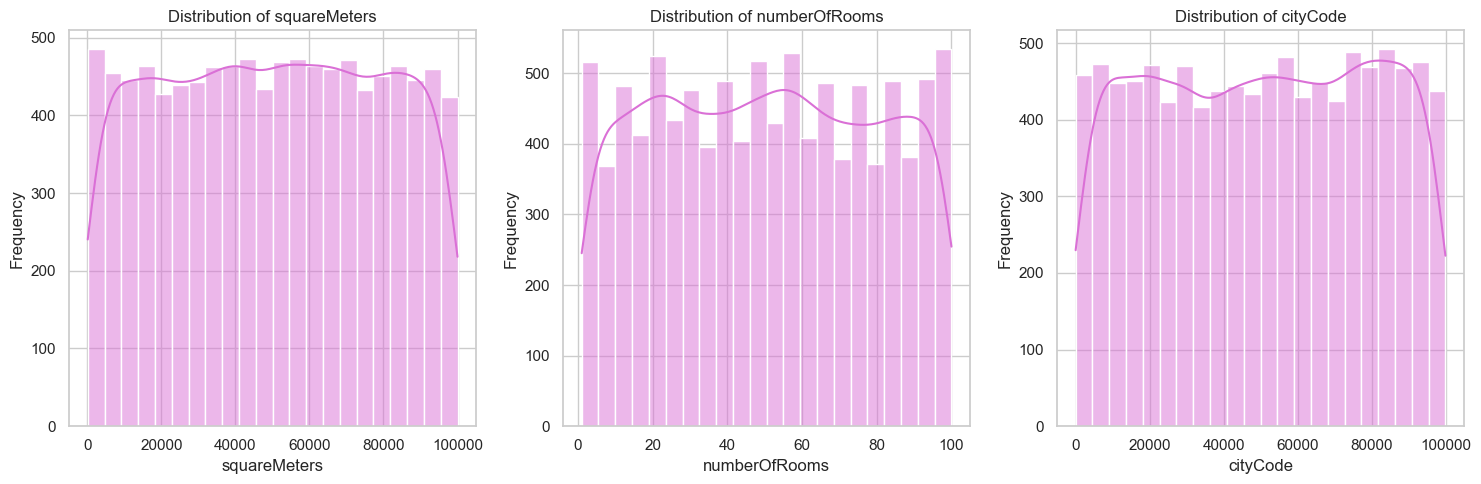

In [23]:
df.columns = df.columns.str.strip()

# Define features (after confirming names)
features = ['squareMeters', 'numberOfRooms', 'cityCode']

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.histplot(df[feature], kde=True, color='orchid')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

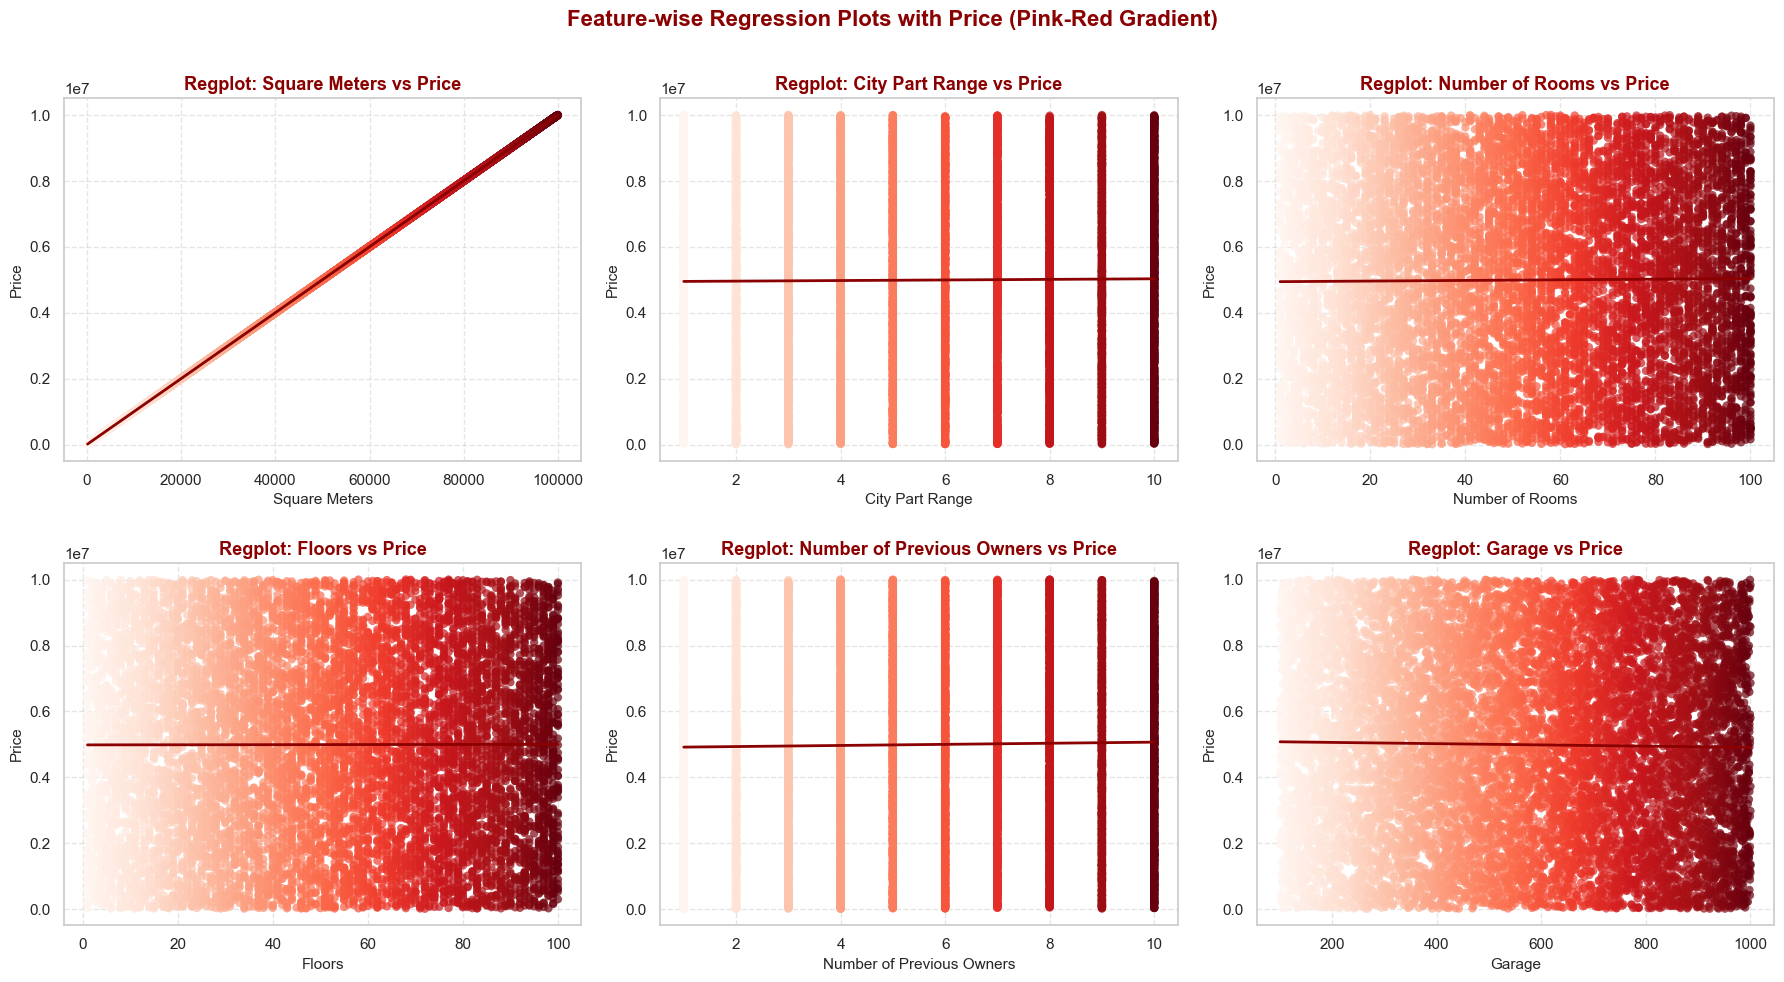

In [24]:

features = ['squareMeters', 'cityPartRange', 'numberOfRooms', 'floors', 'numPrevOwners', 'garage']
titles = ['Square Meters', 'City Part Range', 'Number of Rooms', 'Floors', 'Number of Previous Owners', 'Garage']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Loop through each feature and create a regression plot
for i, feature in enumerate(features):
    # Normalize the feature data for color gradient
    norm = plt.Normalize(df1[feature].min(), df1[feature].max())
    colors = plt.cm.Reds(norm(df1[feature]))  # Apply pink-red gradient
    
    axes[i].scatter(df1[feature], df1['price'], c=colors, edgecolor='none', alpha=0.7)

    # Fit a regression line
    sns.regplot(x=feature, y='price', data=df1, scatter=False, line_kws={'color': 'darkred', 'lw': 2}, ax=axes[i], ci=None)
    
    # Set titles and labels
    axes[i].set_title(f'Regplot: {titles[i]} vs Price', fontsize=13, fontweight='bold', color='darkred')
    axes[i].set_xlabel(titles[i], fontsize=11)
    axes[i].set_ylabel('Price', fontsize=11)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Feature-wise Regression Plots with Price (Pink-Red Gradient)', fontsize=16, fontweight='bold', color='darkred')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



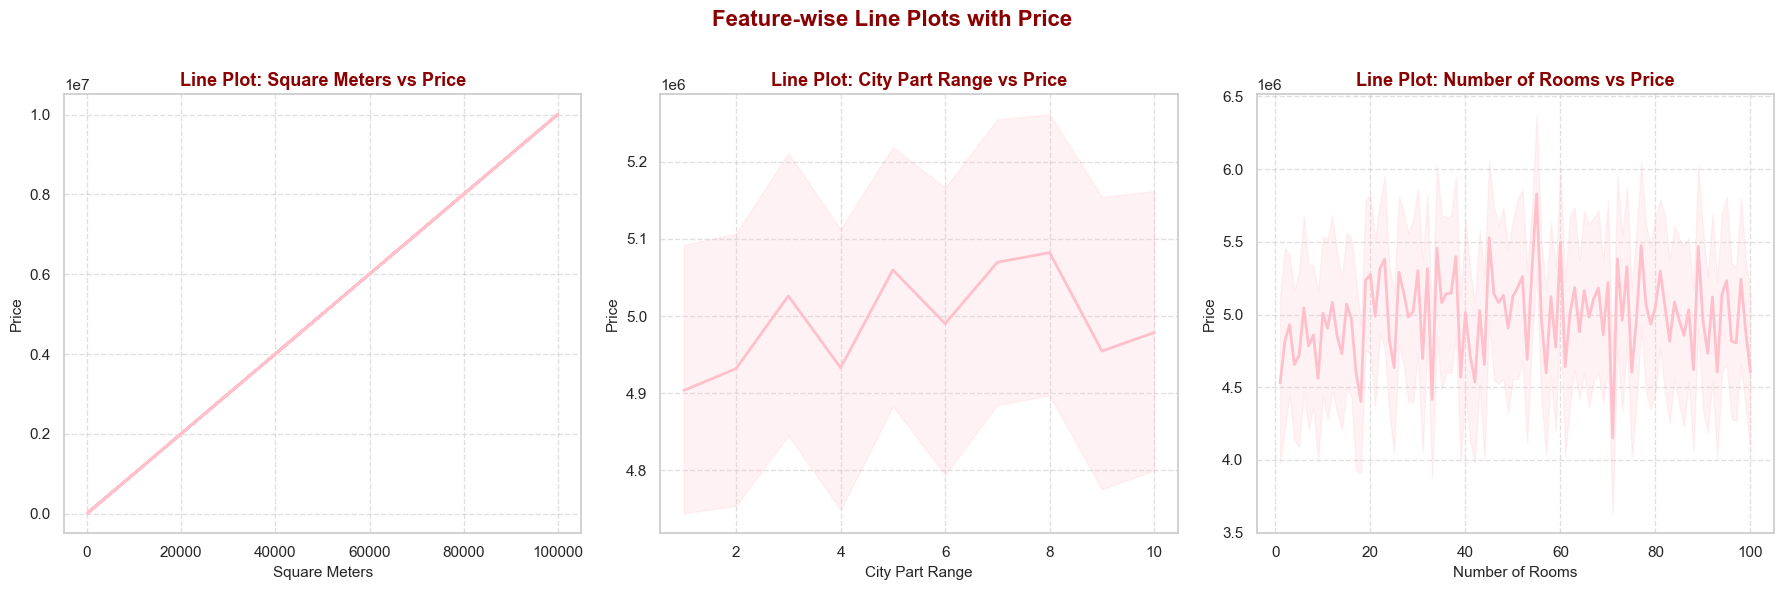

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features to visualize
features = ['squareMeters', 'cityPartRange', 'numberOfRooms']
titles = ['Square Meters', 'City Part Range', 'Number of Rooms']

# Create a 1x3 grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each feature and create a line plot
for i, feature in enumerate(features):
    # Create a line plot with pink gradient (using seaborn for ease)
    sns.lineplot(x=df1[feature], y=df1['price'], ax=axes[i], color='pink', linewidth=2)
    
    axes[i].set_title(f'Line Plot: {titles[i]} vs Price', fontsize=13, fontweight='bold', color='darkred')
    axes[i].set_xlabel(titles[i], fontsize=11)
    axes[i].set_ylabel('Price', fontsize=11)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Layout adjustments
plt.suptitle('Feature-wise Line Plots with Price', fontsize=16, fontweight='bold', color='darkred')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to prevent overlap
plt.show()


In [26]:
c=df1.corr()
c

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
hasStormProtector,0.007480,-0.001656,-0.007598,-0.001001,-0.008566,-0.004941,0.005224,0.002522,-0.000645,1.000000,-0.005001,-0.003753,0.003758,0.001401,-0.006549,0.007496


In [27]:
s=df1.corr()['price']
s.sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
garage              -0.017229
Name: price, dtype: float64

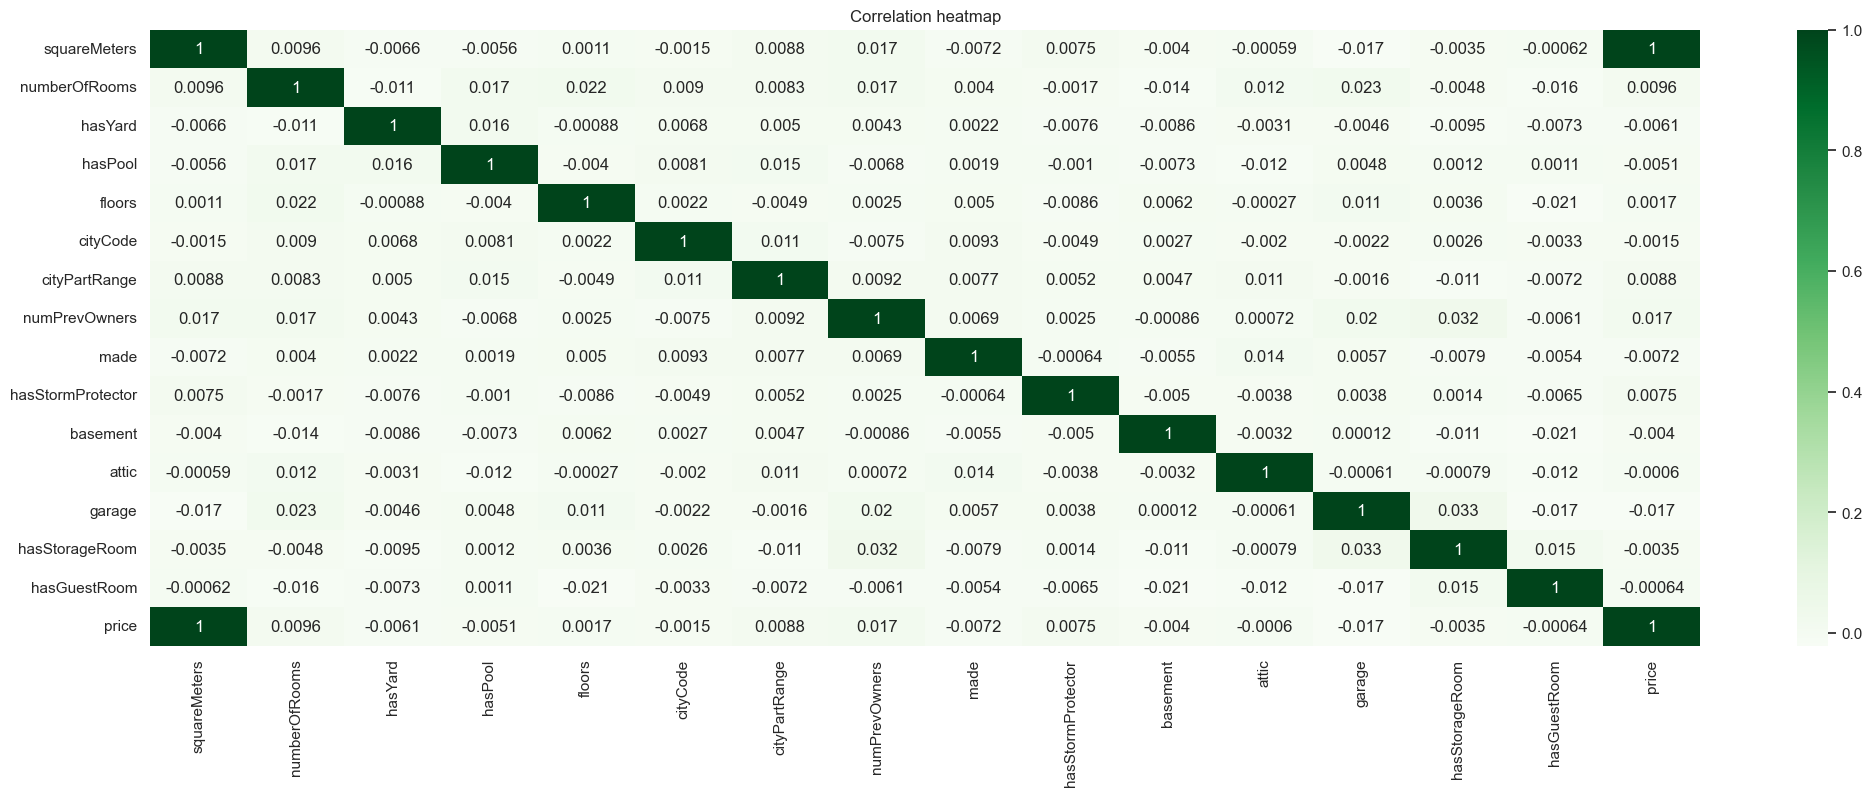

In [28]:
plt.figure(figsize=(25,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

In [29]:
x=df1[['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','hasStormProtector','basement','attic','garage','hasStorageRoom','hasGuestRoom']]
y=df1['price']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [31]:
x_train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
5951,52264,50,1,1,89,83169,3,6,1,491,4498,981,1,10
6630,8746,3,1,0,39,84452,6,1,1,3641,7340,494,0,3
3240,24995,59,1,1,95,84138,7,10,1,6515,5027,837,0,3
5942,74477,22,1,1,27,61997,9,8,0,8045,9970,109,0,6
3789,33369,70,0,0,1,51828,1,6,1,5485,9071,475,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,44219,15,1,1,82,46095,1,5,0,9721,4242,388,1,1
7409,52339,21,1,0,40,62344,7,1,0,7476,879,243,0,10
3325,98149,91,0,1,24,50437,8,10,1,4751,7622,549,1,5
9606,90957,88,0,1,79,62257,1,10,1,4806,9299,920,0,6


In [32]:
y_train

5951    5230980.6
6630     880925.8
3240    2511825.9
5942    7454179.4
3789    3337636.7
          ...    
3714    4436813.1
7409    5240271.0
3325    9820073.8
9606    9099516.3
5787    8295028.3
Name: price, Length: 8000, dtype: float64

In [33]:
# data scaling 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [35]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [36]:
results = {}


In [37]:
for name, model in models.items(): 
                                  
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "r2": r2}

In [38]:
results_df1= pd.DataFrame(results).T
print(results_df1)

                                   MAE          RMSE        r2
Linear Regression         1.449582e+03  1.857248e+03  1.000000
Decision Tree             4.451660e+03  5.574201e+03  0.999996
Random Forest             3.159990e+03  3.910367e+03  0.999998
Gradient Boosting         1.531822e+04  2.023522e+04  0.999952
Support Vector Regressor  2.540256e+06  2.924402e+06 -0.004093
K-Nearest Neighbors       6.020475e+04  7.569679e+04  0.999327
Neural Network            4.854571e+06  5.611441e+06 -2.696995


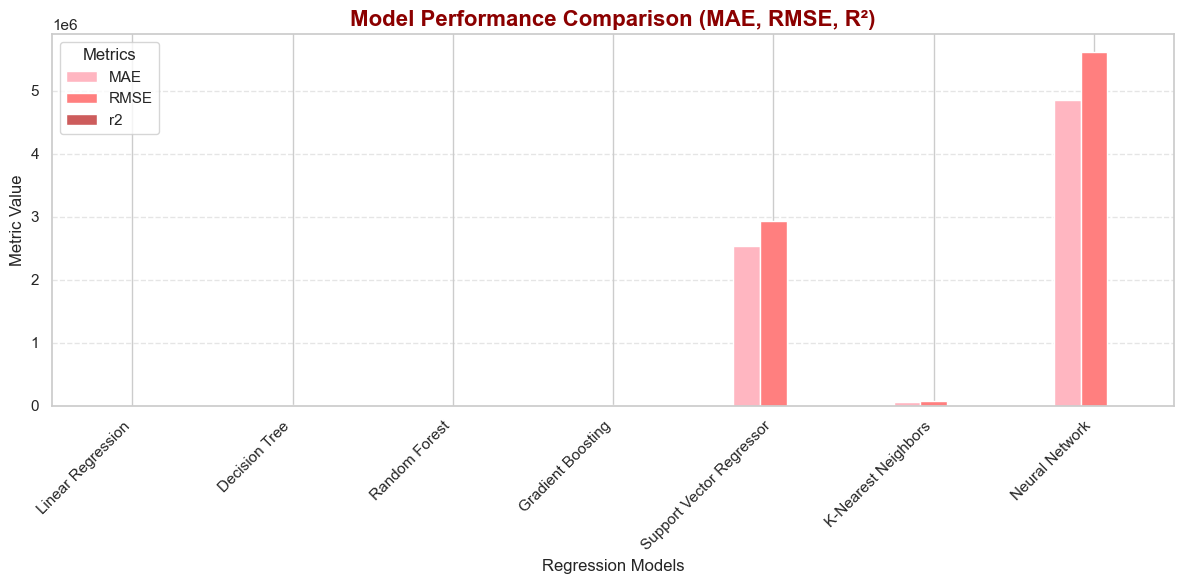

In [39]:
colors = ['#FFB6C1', '#FF7F7F', '#CD5C5C']

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
results_df1[['MAE', 'RMSE', 'r2']].plot(kind='bar', ax=ax, color=colors)
plt.title('Model Performance Comparison (MAE, RMSE, R²)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Regression Models', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred=model.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9999995950142028


In [42]:
# Prediction
new_square_meters = 75523
new_number_of_rooms = 4
new_has_yard = 1
new_has_pool = 0
new_floors = 2
new_city_code = 9373
new_city_part_range = 3
new_num_prev_owners = 1
new_has_storm_protector = 1
new_basement = 0
new_attic = 1
new_garage = 1
new_has_storage_room = 1
new_has_guest_room = 0

In [43]:
# data frame for new house features
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
})

In [44]:
predicted_price = model.predict(new_house_features)
print(f"The Predicted Price: € {predicted_price[0]:.2f}")

The Predicted Price: € 7556112.06


In [45]:
input_data=(87683,2 ,1,1,10, 30308, 3, 1 , 0, 1, 0, 2, 1, 0)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(f"The Predicted Price: € {prediction}")

The Predicted Price: € [8775378.20800109]
